In [8]:
from controller import Imager
from PIL import Image


In [2]:
imager = Imager()

Found 1 devices
Devices IDs - ['101936']


In [3]:
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'
imager.update_params(ExposureTime=20000, AcquisitionFrameRate = 5)

In [36]:
PIXELFORMATS = {'8':'Mono8','12':'Mono12Packed'}
PIXELFORMAT = PIXELFORMATS['8']
imager.update_params(ExposureTime=15000, PixelFormat=PIXELFORMAT, AcquisitionFrameRate = 50)

In [52]:
imager._start_acquisitions()

0 - 2021-09-01 19:20:20.913457 - 101936 captured Mono8 image 


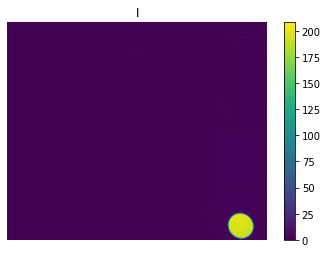

<Figure size 432x288 with 0 Axes>

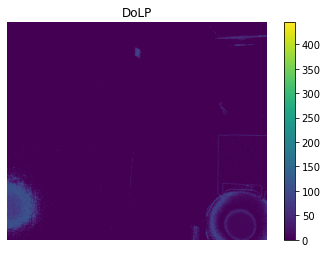

<Figure size 432x288 with 0 Axes>

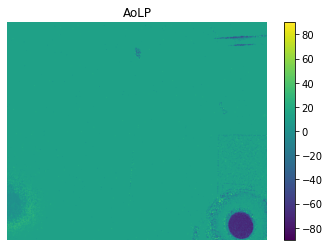

<Figure size 432x288 with 0 Axes>

In [58]:
import cv2
import polanalyser as pa
from PIL import Image
import matplotlib.pyplot as plt
from mpldatacursor import datacursor
import numpy as np
# Based on https://github.com/elerac/polanalyser

init_image = imager.capture_sequence(num_frames=1, sleep_seconds1=0.2,sleep_seconds2=0.2 )
init_image = np.squeeze(np.array(init_image[0]))
img_demosaiced = pa.demosaicing(init_image)
img_0, img_45, img_90, img_135 = cv2.split(img_demosaiced)
#Image.fromarray(img_0).show()
#Image.fromarray(img_45).show()
#Image.fromarray(img_90).show()
#Image.fromarray(img_135).show()

Stokes = pa.calcLinearStokes([img_0, img_45, img_90, img_135], [0,45,90,135])
I= img_0
#I = pa.cvtStokesToIntensity(Stokes)
DoLP = pa.cvtStokesToDoLP(Stokes)
AoLP = (180/np.pi)*pa.cvtStokesToAoLP(Stokes)-90
num = str(3) 
plt.figure(1)
im1 = plt.imshow(I)
plt.colorbar(im1)
datacursor()
plt.title('I')
plt.axis('off')
plt.show(block=True)
plt.savefig(num+'I.png')

plt.figure(2)
im2 = plt.imshow(255*DoLP)
plt.colorbar(im2)
datacursor(im2)
plt.title('DoLP')
plt.axis('off')
plt.show(block=False)
plt.savefig(num+'DoLP.png')
plt.figure(3)
im3 = plt.imshow(AoLP)
plt.colorbar(im3)
datacursor(im3)
plt.title('AoLP')
plt.axis('off')
plt.show(block=True)
plt.savefig(num+'AoLP.png')

In [19]:
print(np.max(DoLP))

1.729255553920842


In [63]:
#imager.get_images(show_images=True, save_images=True)
import matplotlib.pyplot as plt
import numpy as np
import time
num_frames=200
num_cameras=1
time.sleep(10)
raw_images, metadata = imager.capture_sequence(num_frames, sleep_seconds1=5,sleep_seconds2=0.2)
# print(metadata[0])
# print(np.array(raw_images).shape)
raw_images = np.array(raw_images)
for i,(frame, (run_indx, img_time, cam_id)) in enumerate(zip(raw_images, metadata)):
    im = Image.fromarray(frame[0])
    im.save(f'{run_indx}_{img_time.strftime("%Y%m%d_%H%M%S")}_{cam_id}.tiff')
     
# print(np.array(raw_images[0]))
#arr = np.empty((num_frames,num_cameras,2048,2448), dtype='uint8')
#for frame_num in range(num_frames):
#    arr[frame_num] = np.array(raw_images[0][frame_num])
#np.save('cal_g_600_Auto', arr)
print

0 - 2021-09-01 20:12:25.771425 - 101936 captured Mono8 image 
1 - 2021-09-01 20:12:25.992154 - 101936 captured Mono8 image 
2 - 2021-09-01 20:12:26.206028 - 101936 captured Mono8 image 
3 - 2021-09-01 20:12:26.421033 - 101936 captured Mono8 image 
4 - 2021-09-01 20:12:26.635915 - 101936 captured Mono8 image 
5 - 2021-09-01 20:12:31.652253 - 101936 captured Mono8 image 
6 - 2021-09-01 20:12:31.864679 - 101936 captured Mono8 image 
7 - 2021-09-01 20:12:32.092244 - 101936 captured Mono8 image 
8 - 2021-09-01 20:12:32.297181 - 101936 captured Mono8 image 
9 - 2021-09-01 20:12:32.530812 - 101936 captured Mono8 image 
10 - 2021-09-01 20:12:37.537125 - 101936 captured Mono8 image 
11 - 2021-09-01 20:12:37.750974 - 101936 captured Mono8 image 
12 - 2021-09-01 20:12:37.972139 - 101936 captured Mono8 image 
13 - 2021-09-01 20:12:38.183028 - 101936 captured Mono8 image 
14 - 2021-09-01 20:12:38.412285 - 101936 captured Mono8 image 
15 - 2021-09-01 20:12:43.415313 - 101936 captured Mono8 image 
16

130 - 2021-09-01 20:14:58.713115 - 101936 captured Mono8 image 
131 - 2021-09-01 20:14:58.919044 - 101936 captured Mono8 image 
132 - 2021-09-01 20:14:59.152335 - 101936 captured Mono8 image 
133 - 2021-09-01 20:14:59.373126 - 101936 captured Mono8 image 
134 - 2021-09-01 20:14:59.582269 - 101936 captured Mono8 image 
135 - 2021-09-01 20:15:04.593147 - 101936 captured Mono8 image 
136 - 2021-09-01 20:15:04.802890 - 101936 captured Mono8 image 
137 - 2021-09-01 20:15:05.033155 - 101936 captured Mono8 image 
138 - 2021-09-01 20:15:05.249816 - 101936 captured Mono8 image 
139 - 2021-09-01 20:15:05.464608 - 101936 captured Mono8 image 
140 - 2021-09-01 20:15:10.479367 - 101936 captured Mono8 image 
141 - 2021-09-01 20:15:10.712934 - 101936 captured Mono8 image 
142 - 2021-09-01 20:15:10.932941 - 101936 captured Mono8 image 
143 - 2021-09-01 20:15:11.153189 - 101936 captured Mono8 image 
144 - 2021-09-01 20:15:11.362340 - 101936 captured Mono8 image 
145 - 2021-09-01 20:15:16.382259 - 10193

<function print>

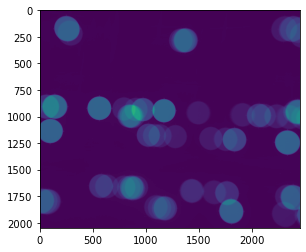

In [48]:
import matplotlib.pyplot as plt

sum_images = raw_images.sum(axis=0)
sum_images = 255*sum_images/(np.max(sum_images))
plt.imshow(sum_images[0])

In [131]:
import glob
import os
datapath ="C:/Users/masadatz/svs_vistek/cal_green_600_ex15000"
images = np.zeros([2048,2448])
isimages = np.zeros([2048,2448])
for img in glob.glob(os.path.join(datapath, "*.tiff")):
    im = np.array(Image.open(os.path.join(datapath, img)))
    im[(im<150)]=0
    isim = np.copy(im)
    isim[(np.nonzero(isim))]=1
    images+=im
    print (np.max(images))
    isimages+=isim


236.0
236.0
236.0
236.0
236.0
236.0
236.0
469.0
698.0
931.0
1162.0
1371.0
1601.0
1601.0
1824.0
1824.0
2054.0
2054.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2279.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2281.0
2484.0
2484.0
2484.0
2484.0
2708.0
2708.0
2708.0
2708.0
2708.0
2931.0
2931.0
2931.0
2931.0
2931.0
3158.0
3158.0
3158.0
3158.0
3380.0
3380.0
3608.0
3608.0
3832.0
3832.0
4058.0
4058.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4282.0
4398.0
4398.0
4610.0
4610.0
4610.0
4610.0
4610.0
4784.0
4784.0
4784.0
4784.0
4784.0
5009.0
5009.0
5009.0
5009.0
5009.0
52

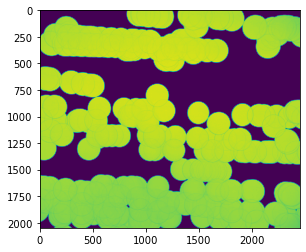

In [135]:
mean_image = np.zeros([2048,2448])
mean_image[(np.nonzero(isimages))]= images[(np.nonzero(isimages))]/isimages[(np.nonzero(isimages))]
plt.imshow(mean_image)
#plt.imshow(images)
im = Image.fromarray(mean_image)
im.save("green_600_ex15000_mean_filter150.tiff", format="TIFF", save_all=True)


235


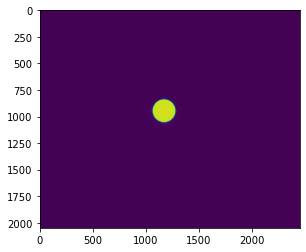

In [103]:
img = "C:/Users/masadatz/svs_vistek/cal_green_600_ex15000/2_20210901_180321_101936.tiff"
im = np.array(Image.open(img))
print (np.max(im))
plt.imshow(im)


In [105]:

mean_image = np.array([0,0,0])
images = np.array([3,0,15])
isimages = np.array([2,0,3])

mean_image[(np.nonzero(isimages))]= images[(np.nonzero(isimages))]/isimages[(np.nonzero(isimages))]
print (images+isimages)

[ 5  0 18]


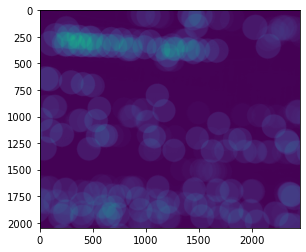

In [82]:
plt.imshow(images)

In [109]:
imager._stop_acquisitions()

In [8]:
imager.clear_all()


In [22]:
imager.cams[-1].remote_device.node_map.ExposureAuto.value = 'Off'

'Off'

In [10]:
import numpy as np
np.array(raw_images[0]).shape

(5, 2048, 2448)

In [35]:
num_frames =5
num_cameras = 1
arr = np.empty((num_frames,num_cameras,2048,2448), dtype='uint8')
for frame_num in range(num_frames):
    arr[frame_num] = np.array(raw_images[frame_num])


ValueError: could not broadcast input array from shape (5,1,2048,2448) into shape (1,2048,2448)

In [25]:
import pickle
pickle.dump(raw_images, open("dump3.pkl", 'wb'))

In [14]:
np.save('arr', arr)